# Tutorial 7: FSA + Filtering

## Example 1: 
Filtering in the frequency domain (synthetic data -- same as in Tutorial 6)

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#create x1 and x2 as a superposition of synthetic signals
k = 2 * np.pi / 50
omega = [2*np.pi/150, 2*np.pi/75, 2*np.pi/20] # = [0.0419, 0.0838, 0.3142]

x = [float(kk) for kk in range(100)]
t = [float(kk) for kk in range(300)]
x = np.asarray(x).reshape(-1,1)
t = np.asarray(t).reshape(-1,1)

y0 = [0.5*np.sin(k*x[0] - omega[0]*tjj) for tjj in t]
y1 = [1.0*np.sin(k*x[16] - omega[1]*tjj) for tjj in t]
y2 = [2.0*np.sin(k*x[69] - omega[2]*tjj) for tjj in t]
y3 = [0.01*tjj for tjj in t]

#x1 is sum of these 4 signals
x1 = [y0[kk]+y1[kk]+y2[kk]+y3[kk] for kk in range(len(y0))]

#x2 is x1 with a linear trend removed
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(t,x1)
ypred_MLR = lm_MLR.predict(np.asarray(t).reshape(-1,1)) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
x2 = x1 - ypred_MLR

x1 = np.squeeze(np.asarray(x1))
x2 = np.squeeze(np.asarray(x2))

N = len(x2) #number of points
T = 300 #length of record
dt = T/N #time interval

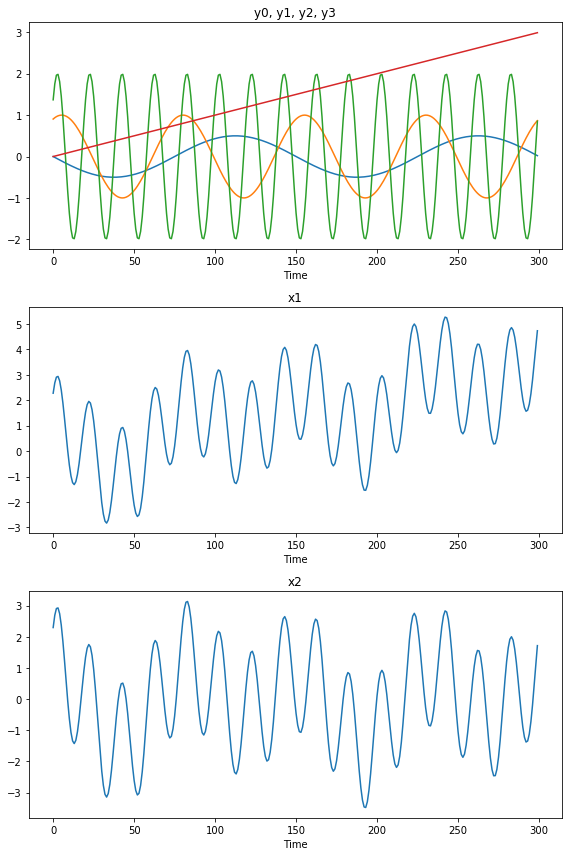

In [3]:
#visualize

plt.figure(figsize=(8,12))

plt.subplot(311)
plt.plot(y0)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.title('y0, y1, y2, y3')
plt.xlabel('Time')

plt.subplot(312)
plt.plot(x1)
plt.title('x1')
plt.xlabel('Time')

plt.subplot(313)
plt.plot(x2)
plt.title('x2')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

Step 1: FFT of x2 

In [4]:
x2fft = np.fft.fft(x2)
Sx2 = np.abs(np.square(x2fft))
freq2 = np.fft.fftfreq(np.arange(len(x2fft)).shape[-1]) #frequency

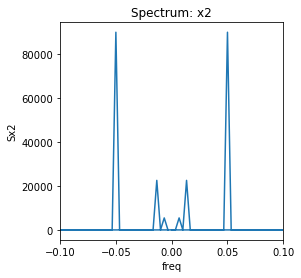

In [5]:
#visualize

plt.figure(figsize=(4,4))

plt.plot(freq2,Sx2)
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')
plt.xlim((-0.1,0.1))

plt.show()

Step 2: apply filter on X(w) to retrieve the signal with the lowest frequency (note: lowest frequency is at index=4 in the fft array)

In [6]:
index = 4
x2fft_filter = np.zeros_like(x2fft)
x2fft_filter[index] = x2fft[index]
x2fft_filter[-index] = x2fft[-index]

Sx2_filter = np.abs(np.square(x2fft_filter))

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


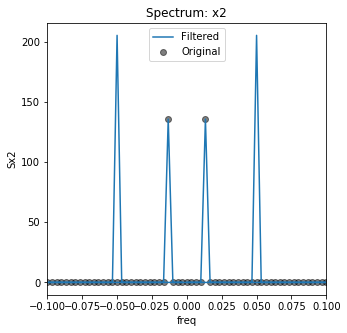

In [7]:
#visualize

plt.figure(figsize=(5,5))
plt.scatter(freq2,x2fft_filter,color='k',alpha=0.5)
plt.plot(freq2,x2fft)
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')
plt.xlim((-0.1,0.1))
plt.legend(('Filtered','Original'))

Step 3: apply inverse FFT to retrieve filtered x(t)

In [8]:
x2_filter = np.fft.ifft(x2fft_filter)

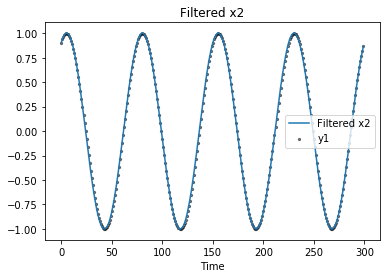

In [9]:
#visualize

plt.plot(t,x2_filter)
plt.scatter(t,y1,s=5,color='k',alpha=0.5)
plt.title('Filtered x2')
plt.xlabel('Time')
plt.legend(('Filtered x2','y1'))

plt.show()